# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# we are reading the data directly from raw github link
# we are also defining the name of the columns.
df=pd.read_csv('https://raw.githubusercontent.com/humblefool02/Haberman_dataset/main/haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
df.head()

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

In [38]:
#to know the number of data points and features
print(df.shape) #to get the no of rows and columns
df.info() #to get the concise summary of dataset

(306, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_Year   306 non-null    int64
 2   axil_nodes       306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB



##### **Observations:**

##### **->There are 306 rows and 4 columns in the data set and there are no missing values.**


In [39]:
#number of classes and data points per class
df["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

##### **Observations:**

##### **->Among the 306 breast cancer patients surveyed, 225 survived 5 years or more(Status=1), 81 survived less than 5 years(Status=2)**

In [40]:
#statistical info of the dataset
df.describe()

,age,operation_Year,axil_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [64]:
# df.loc[(df['age']<44) & (df['age']>61)]
analysis_df = df.loc[(df['age']<44) | (df['age']>61)]
analysis_df.groupby(['survival_status']).count()

# analysis2_df = df.loc[(df['age']<44) & (df['survival_status']==1)]
# analysis2_df.count()

,age,operation_Year,axil_nodes
survival_status,,,
1,109,109,109
2,32,32,32


##### **Observations:**

##### **->No of patients below 44 years(Q1) or above 61 years(Q3) is 141. Out of 141, 109 patients survived 5 years or more.**

##### **->Number of patients between 44-61 years is 165(306 minus 141). Therefore, maximum no of patients are in this age group.**

In [67]:
analysis1_df = df.loc[(df['age']>=44) & (df['age']<=61)]
analysis1_df.groupby(['survival_status'])['axil_nodes'].mean()

survival_status
1    2.801724
2    7.836735
Name: axil_nodes, dtype: float64

##### **Observations**

##### **->In the age group 44-61, average number of positive axillary nodes among those who survived, is ~2.8. Whereas, the average number of positive axillary nodes among those who could not survive is ~7.8.**

In [65]:
df.groupby(['survival_status'])['axil_nodes'].mean()

survival_status
1    2.791111
2    7.456790
Name: axil_nodes, dtype: float64

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

##### **Problem objective:**

##### **->The objective of the problem is to know if a patient who has undergone surgery for breast cancer, survives more than 5 years or not, by analysing the relation between given data- age of the patient, number of axillary nodes and the operation year.**

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

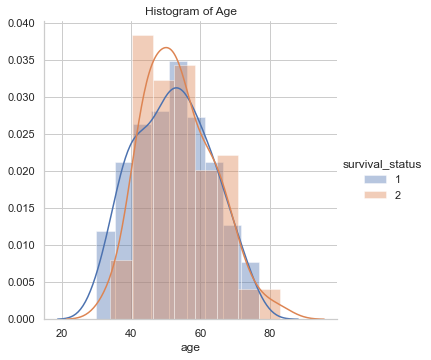

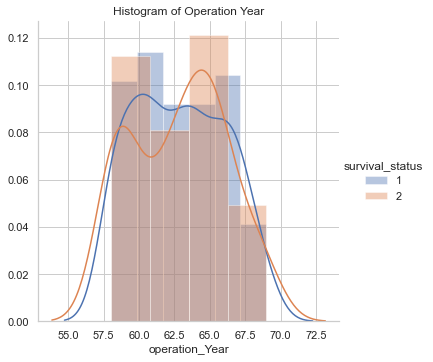

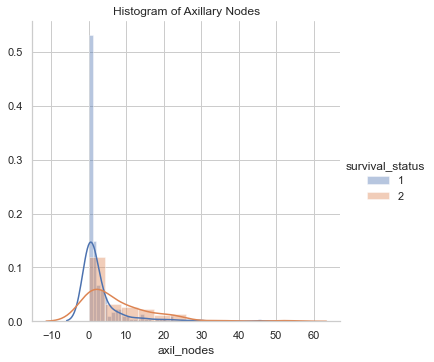

In [59]:
#Histogram for age
import warnings
sns.FacetGrid(df, hue="survival_status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram of Age')
plt.show();
warnings.filterwarnings('ignore')

sns.FacetGrid(df, hue="survival_status", height=5) \
   .map(sns.distplot, "operation_Year") \
   .add_legend();
plt.title('Histogram of Operation Year')
plt.show();
warnings.filterwarnings('ignore')

sns.FacetGrid(df, hue="survival_status", height=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.title('Histogram of Axillary Nodes')
plt.show();
warnings.filterwarnings('ignore')

##### **Observations:**

##### **->From the histogram of age, we can see that there is no clear distinction. So,we cannot determine the survival status of patients based solely on their age. However, most patients are in the age group of 40-61years.**

##### **->From the histogram of operation year, we cannot say the survival status of the patients based on the year of operation. However, from year 1966, we see that relatively lesser number of patients underwent breast cancer surgery.**

##### **->From the histogram of axillary nodes, we can see that most patients have less than 10 axillary nodes. For patients who survived more than 5 years, the curve has a sharper fall and less spread, which indicates fewer axillary nodes. For patients who survived less than 5 years, the number of axillary nodes is spread over a wide range.**



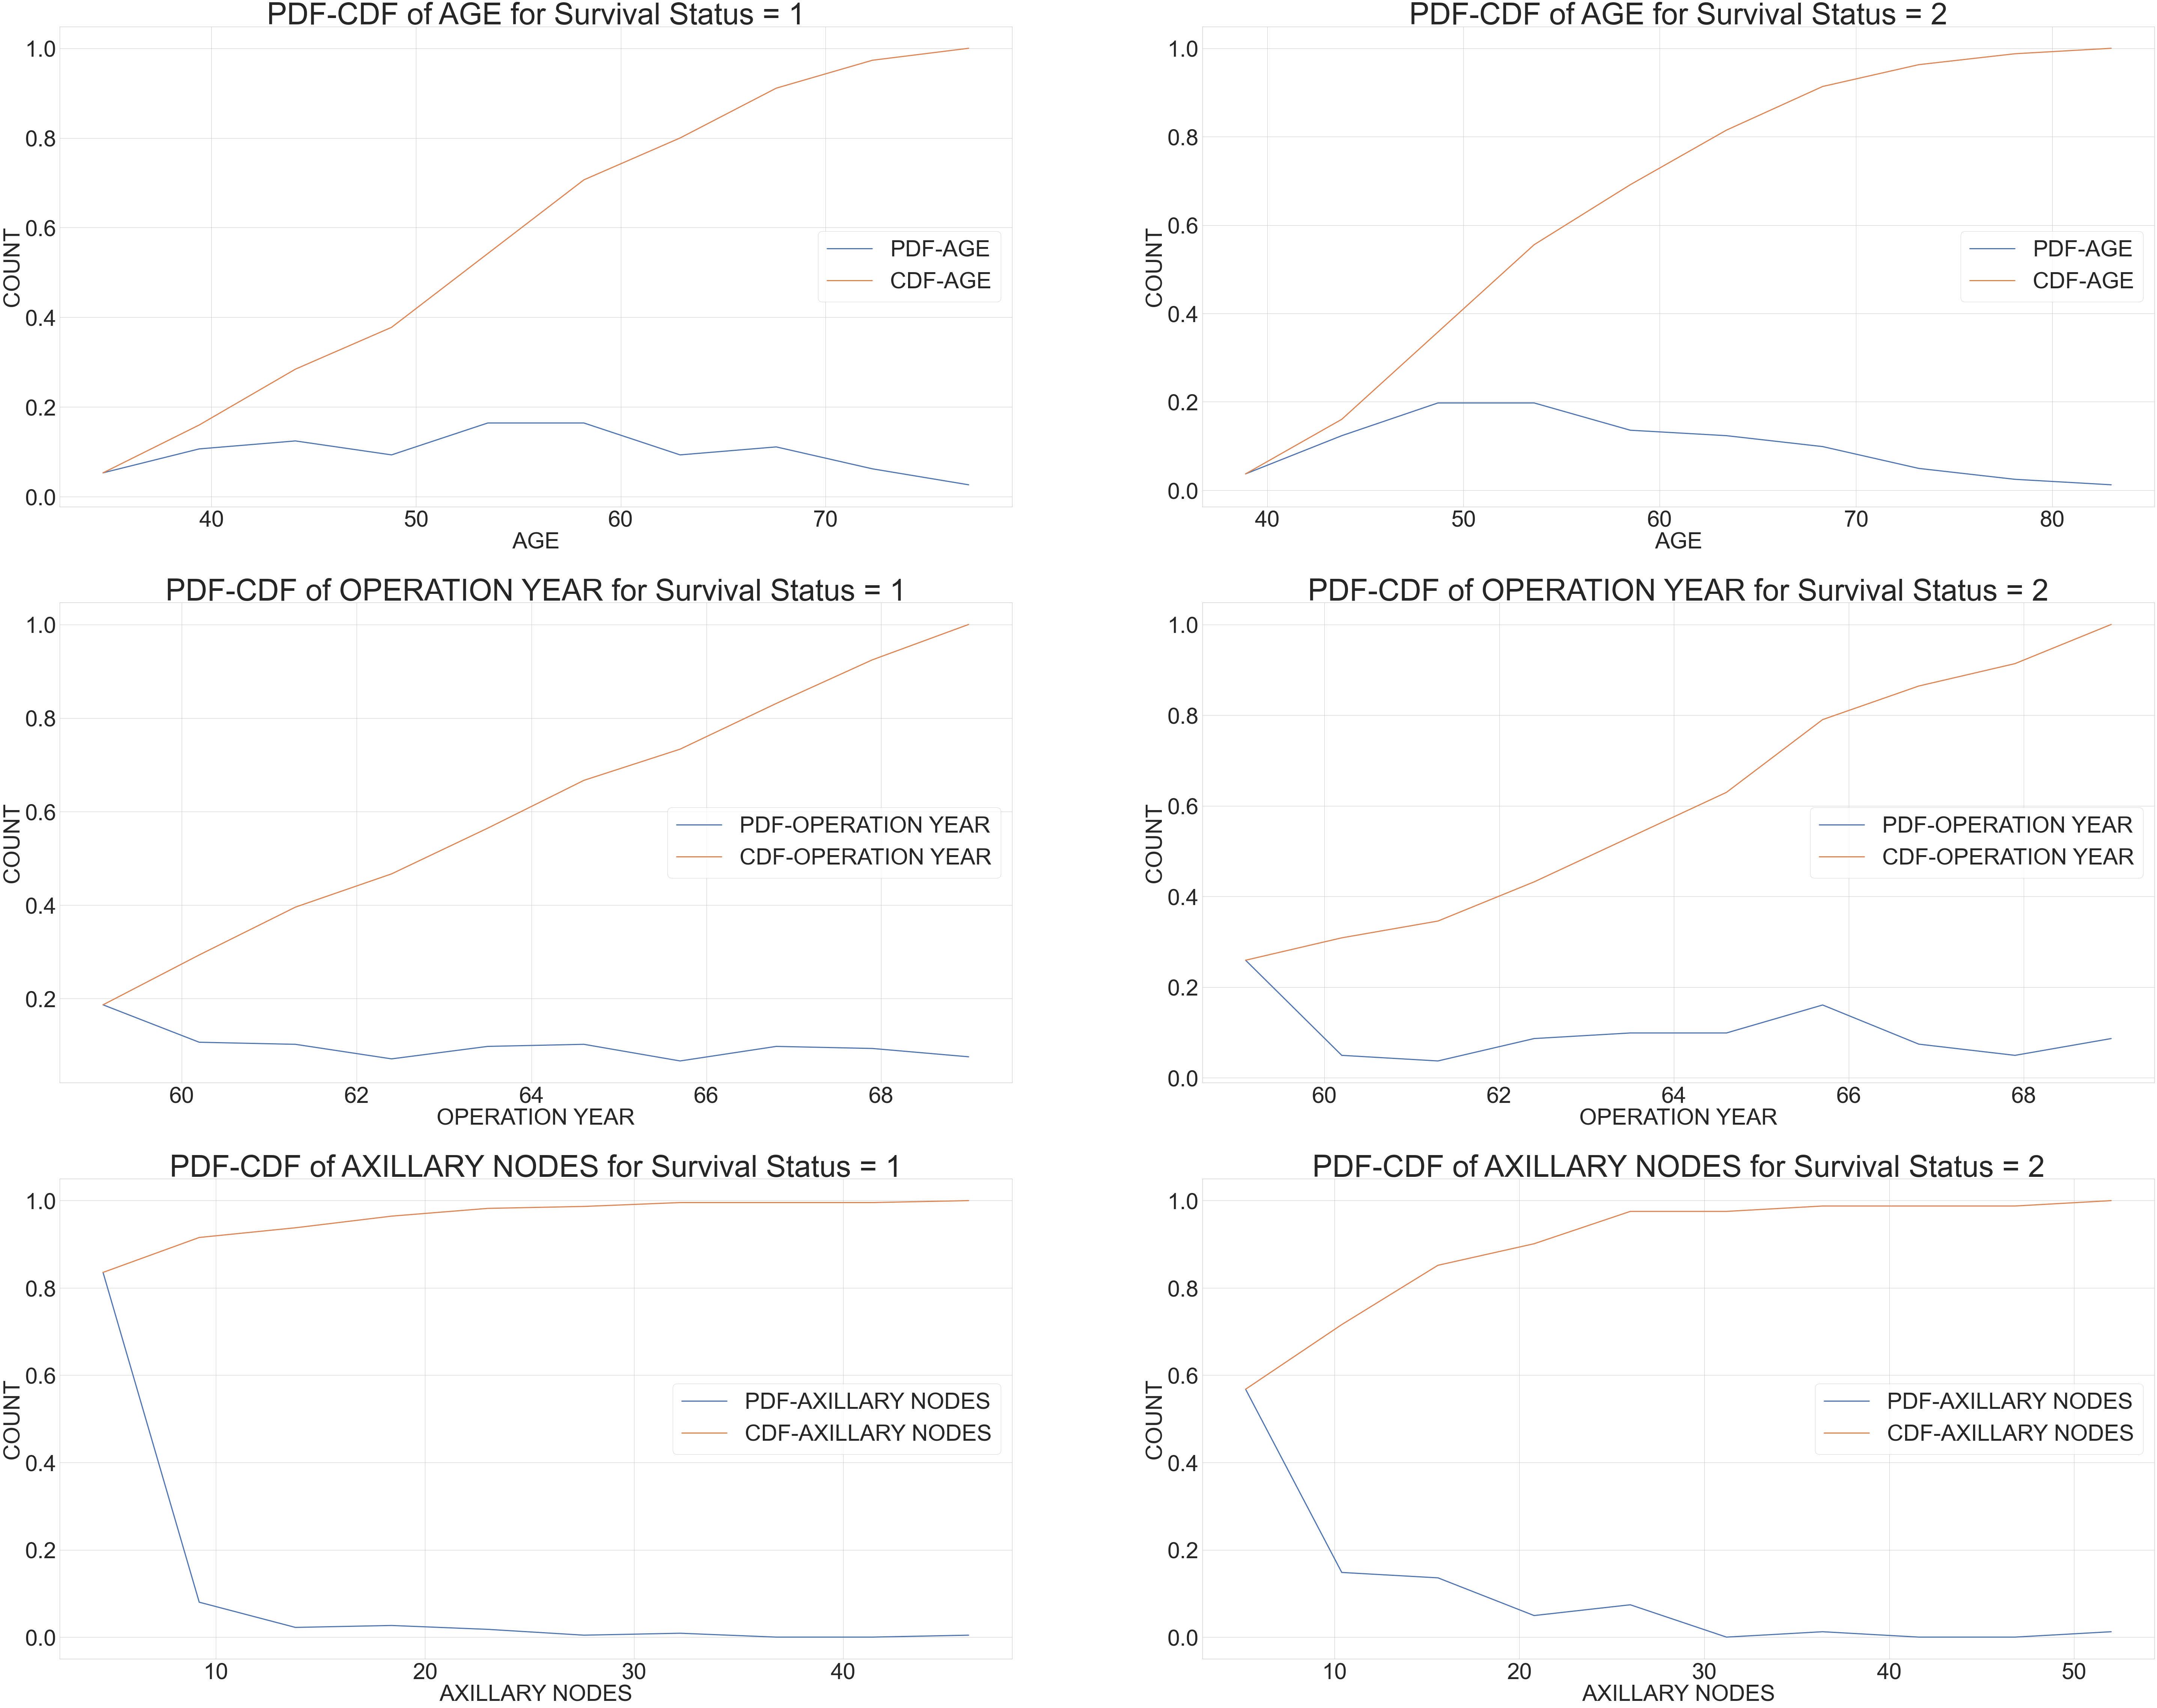

In [31]:
plt.figure(figsize=(100, 80))
plt.subplot(321)
counts,bin_edges=np.histogram(df.loc[df["survival_status"]==1]["age"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.xlabel('AGE', fontsize = 60)
plt.ylabel("COUNT", fontsize = 60)
plt.xticks(fontsize = 60)
plt.yticks(fontsize = 60)
plt.title('PDF-CDF of AGE for Survival Status = 1', fontsize = 80)
plt.legend(['PDF-AGE', 'CDF-AGE'], loc = 5,prop={'size': 60})

plt.subplot(322)
counts,bin_edges=np.histogram(df.loc[df["survival_status"]==2]["age"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.xlabel('AGE', fontsize = 60)
plt.ylabel("COUNT", fontsize = 60)
plt.xticks(fontsize = 60)
plt.yticks(fontsize = 60)
plt.title('PDF-CDF of AGE for Survival Status = 2', fontsize = 80)
plt.legend(['PDF-AGE', 'CDF-AGE'], loc = 5,prop={'size': 60})

plt.subplot(323)
counts,bin_edges=np.histogram(df.loc[df["survival_status"]==1]["operation_Year"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.xlabel('OPERATION YEAR', fontsize = 60)
plt.ylabel("COUNT", fontsize = 60)
plt.xticks(fontsize = 60)
plt.yticks(fontsize = 60)
plt.title('PDF-CDF of OPERATION YEAR for Survival Status = 1', fontsize = 80)
plt.legend(['PDF-OPERATION YEAR', 'CDF-OPERATION YEAR'], loc = 5,prop={'size': 60})

plt.subplot(324)
counts,bin_edges=np.histogram(df.loc[df["survival_status"]==2]["operation_Year"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.xlabel('OPERATION YEAR', fontsize = 60)
plt.ylabel("COUNT", fontsize = 60)
plt.xticks(fontsize = 60)
plt.yticks(fontsize = 60)
plt.title('PDF-CDF of OPERATION YEAR for Survival Status = 2', fontsize = 80)
plt.legend(['PDF-OPERATION YEAR', 'CDF-OPERATION YEAR'], loc = 5,prop={'size': 60})

plt.subplot(325)
counts,bin_edges=np.histogram(df.loc[df["survival_status"]==1]["axil_nodes"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.xlabel('AXILLARY NODES', fontsize = 60)
plt.ylabel("COUNT", fontsize = 60)
plt.xticks(fontsize = 60)
plt.yticks(fontsize = 60)
plt.title('PDF-CDF of AXILLARY NODES for Survival Status = 1', fontsize = 80)
plt.legend(['PDF-AXILLARY NODES', 'CDF-AXILLARY NODES'], loc = 5,prop={'size': 60})

plt.subplot(326)
counts,bin_edges=np.histogram(df.loc[df["survival_status"]==2]["axil_nodes"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.xlabel('AXILLARY NODES', fontsize = 60)
plt.ylabel("COUNT", fontsize = 60)
plt.xticks(fontsize = 60)
plt.yticks(fontsize = 60)
plt.title('PDF-CDF of AXILLARY NODES for Survival Status = 2', fontsize = 80)
plt.legend(['PDF-AXILLARY NODES', 'CDF-AXILLARY NODES'], loc = 5,prop={'size': 60})


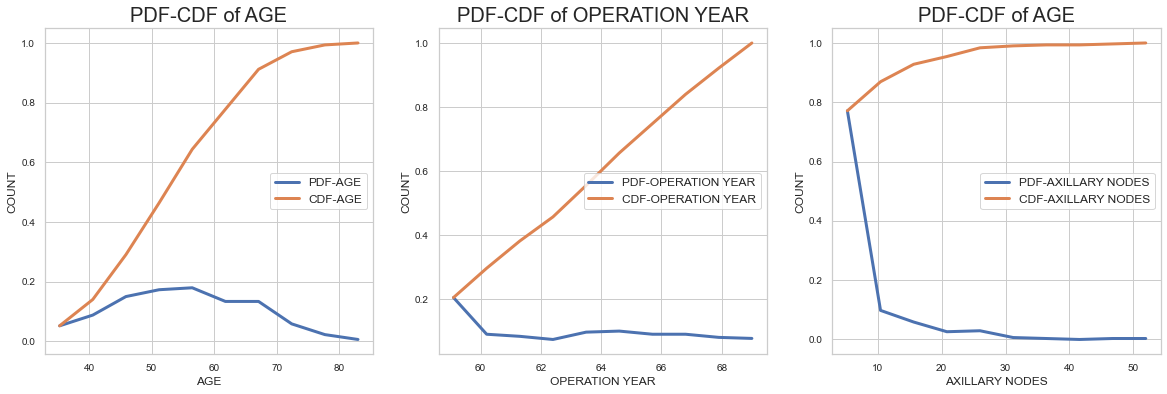

In [30]:
plt.figure(figsize=(20, 6))
plt.subplot(131)
counts,bin_edges=np.histogram(df["age"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.xlabel('AGE', fontsize = 12)
plt.ylabel("COUNT", fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('PDF-CDF of AGE', fontsize = 20)
plt.legend(['PDF-AGE', 'CDF-AGE'], loc = 5,prop={'size': 12})

plt.subplot(132)
counts,bin_edges=np.histogram(df["operation_Year"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.xlabel('OPERATION YEAR', fontsize = 12)
plt.ylabel("COUNT", fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('PDF-CDF of OPERATION YEAR', fontsize = 20)
plt.legend(['PDF-OPERATION YEAR', 'CDF-OPERATION YEAR'], loc = 5,prop={'size': 12})


plt.subplot(133)
counts,bin_edges=np.histogram(df["axil_nodes"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.xlabel('AXILLARY NODES', fontsize = 12)
plt.ylabel("COUNT", fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('PDF-CDF of AGE', fontsize = 20)
plt.legend(['PDF-AXILLARY NODES', 'CDF-AXILLARY NODES'], loc = 5,prop={'size': 12})


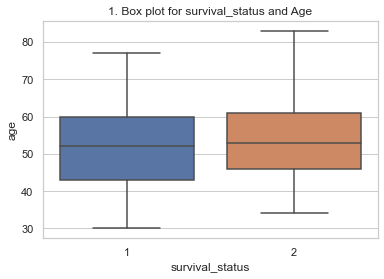

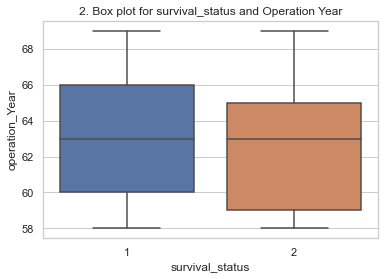

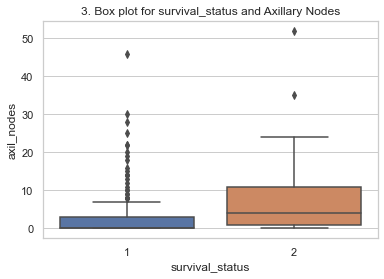

In [29]:
sns.boxplot(x = "survival_status" , y = "age", data = df )
plt.title("1. Box plot for survival_status and Age")
plt.show()

sns.boxplot(x = "survival_status" , y = "operation_Year", data = df )
plt.title("2. Box plot for survival_status and Operation Year")
plt.show()

sns.boxplot(x = 'survival_status', y = 'axil_nodes', data = df)
plt.title("3. Box plot for survival_status and Axillary Nodes")
plt.show()

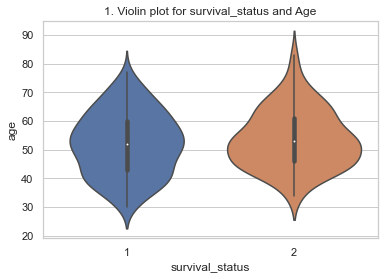

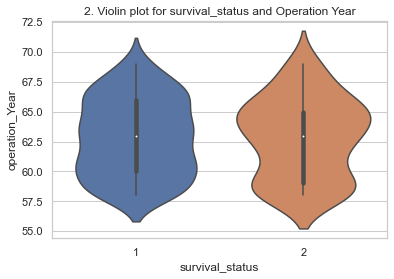

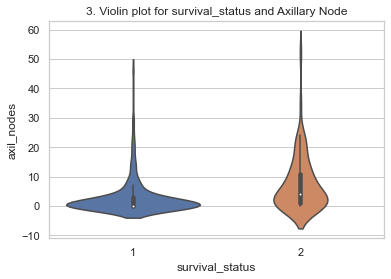

In [28]:
sns.violinplot(x = 'survival_status', y = 'age', data = df)
plt.title("1. Violin plot for survival_status and Age")
plt.show()

sns.violinplot(x = 'survival_status', y = 'operation_Year', data = df)
plt.title("2. Violin plot for survival_status and Operation Year")
plt.show()

sns.violinplot(x = 'survival_status', y = 'axil_nodes', data = df)
plt.title("3. Violin plot for survival_status and Axillary Node")
plt.show()

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


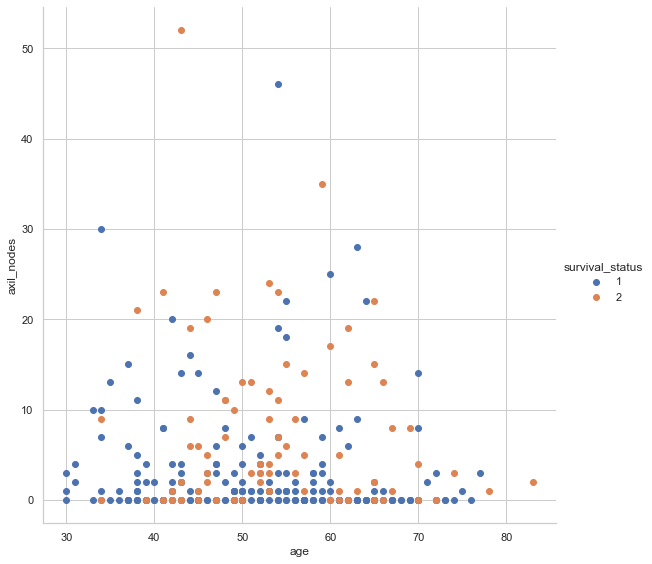

In [26]:
sns.set_style("whitegrid");
# sns.set_theme('notebook', style='dark')
sns.FacetGrid(df, hue="survival_status", height=8) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend();
plt.show();

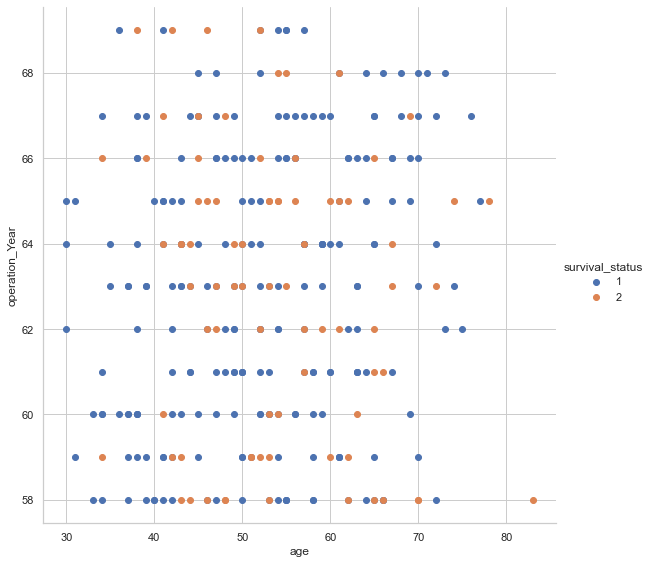

In [27]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="survival_status", height=8) \
   .map(plt.scatter, "age", "operation_Year") \
   .add_legend();
plt.show();

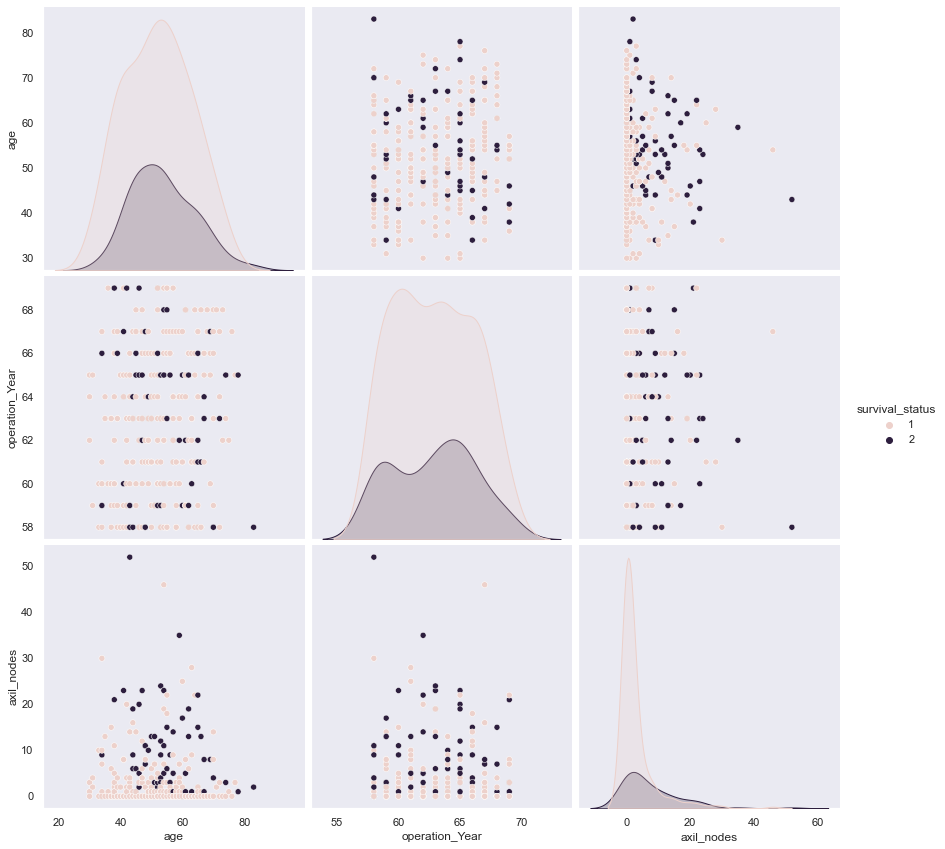

In [18]:
plt.close()
sns.set_theme('notebook', style='dark')
# plt.style.use("dark_background")
sns.pairplot(df,hue="survival_status",height=4)
plt.show()

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

##### **SUMMARY OF OBSERVATIONS:**

##### **->There are only 25% of patients below 44 years of age and 75% of patients are below 60.75 years. Therefore, maximum number of patients are in the age group of 44-61 years.**

##### **->There is no clarity on the relationship between operation year and survival status. However, the number of patients who survived more than 5 years is higher in 1960-1961. Also, the number of patients who underwent surgery is almost constant from 1965-1970 and this is relatively lesser than the number of patients between 1958-1960.**

##### **->75% of patients have axillary nodes less than 4. However, the average number of axillary nodes in patients who survived 5 years or more is 2.8. This number is 7.45 for those who did not survive more than 5 years. So we can say that lower the number of axillary nodes, higher are the chances of survival.**

##### **FINAL CONCLUSION:**

##### **The age group that is most affected by breast cancer is 44-61 years. Irrespective of age, the chances of survival mostly depends on number of axillary nodes. Lesser the number of nodes, higher will be the chances of survival.**